In [4]:
!pip install keras


In [5]:
import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


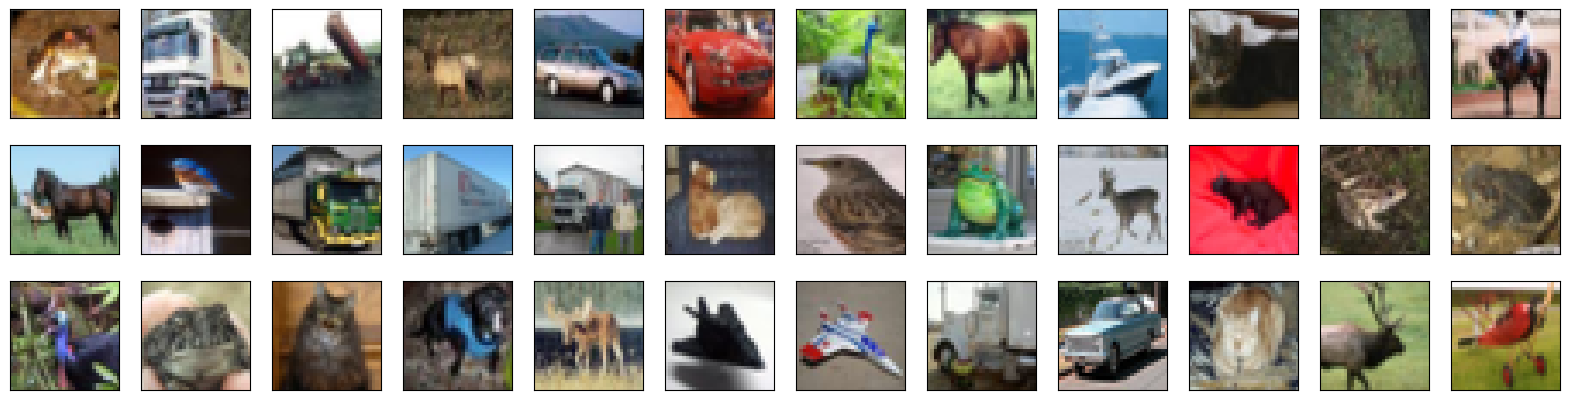

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 5))
for i in range(36):
  ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_train[i]))

In [7]:
#rescaling the image
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [8]:
#breaking the dataset into test, train shapes
import keras
from tensorflow import keras
#performing the one_hot encoding of the labels
classes_count = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, classes_count)
y_test = keras.utils.to_categorical(y_test, classes_count)

#break training set in to train and val sets

(x_train, x_val) = x_train[5000:], x_train[:5000]
(y_train, y_val) = y_train[5000:], y_train[:5000]

#print shapes of training and images from different sets
print("x_train shape:", x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_val.shape[0], 'validation samples')


x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential(
    [
        Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=2),
        Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
        MaxPooling2D(pool_size=2),
        Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
        MaxPooling2D(pool_size=2),
        Dropout(0.3),
        Flatten(),
        Dense(500, activation='relu'),
        Dropout(0.4),
        Dense(10, activation='softmax')
    ]
)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       512,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,094 (2.06 MB)

 Trainable params: 541,094 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_val, y_val), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/20
1397/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5868 - loss: 1.2932
Epoch 1: val_loss improved from inf to 1.25407, saving model to model.weights.best.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5868 - loss: 1.2932 - val_accuracy: 0.5844 - val_loss: 1.2541
Epoch 2/20
1392/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5840 - loss: 1.3068
Epoch 2: val_loss improved from 1.25407 to 1.21863, saving model to model.weights.best.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5839 - loss: 1.3069 - val_accuracy: 0.6350 - val_loss: 1.2186
Epoch 3/20
1397/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5853 - loss: 1.3190
Epoch 3: val_loss improved from 1.21863 to 1.11483, saving model to model.weights.best.keras
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5853 - loss: 1.3190 - val_accuracy: 0.6548 - val_loss: 1.1148
Epoch 4/20
1399/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5782 - loss: 1.3242
Epoch 4: val_los

In [13]:
model.load_weights('model.weights.best.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


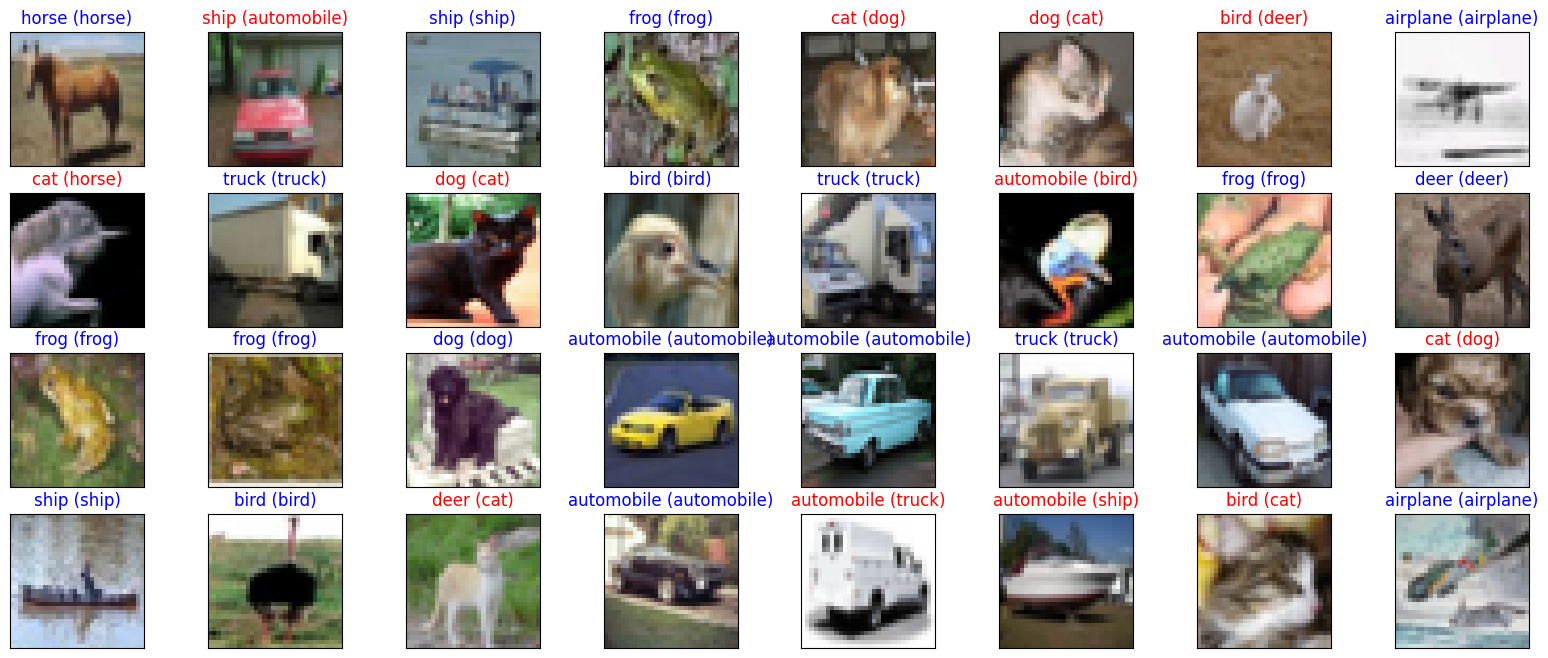

In [14]:
# get predictions on the test set
y_hat = model.predict(x_test)
# define text labels (source:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
  ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_test[idx]))
  pred_idx = np.argmax(y_hat[idx])
  true_idx = np.argmax(y_test[idx])
  ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]), color=("blue" if pred_idx == true_idx else "red"))